In [91]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from acquire import get_telco_data, get_iris_data, get_titanic_data
from pydataset import data
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
SELECT
  age, min(coins_needed), w.power
FROM wands w
  JOIN wands_property p ON w.code = p.code
WHERE is_evil = 0
GROUP BY age, w.power
ORDER BY power DESC, age DESC;

In [3]:
df_iris = data('iris')

In [13]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [15]:
df_iris.shape

(150, 5)

In [4]:
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [19]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [5]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Read the data from this google sheet into a dataframe, df_google.

In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [8]:
df_google = pd.read_csv(csv_export_url)

In [77]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
df_google.shape

(891, 12)

In [9]:
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [10]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [92]:
df_google.dtypes[df_google.dtypes == object]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [12]:
for i in df_google.columns:
    if df_google[i].dtypes == 'object':
        print(f'{i} has {df_google[i].nunique()} unique values')

Name has 891 unique values
Sex has 2 unique values
Ticket has 681 unique values
Cabin has 147 unique values
Embarked has 3 unique values


In [13]:
df_google[['Name','Sex', 'Ticket', 'Cabin', 'Embarked']].value_counts(dropna=False)

Name                                     Sex     Ticket     Cabin  Embarked
Abbing, Mr. Anthony                      male    C.A. 5547  NaN    S           1
Nysveen, Mr. Johan Hansen                male    345364     NaN    S           1
Nicholson, Mr. Arthur Ernest             male    693        NaN    S           1
Nicola-Yarred, Master. Elias             male    2651       NaN    C           1
Nicola-Yarred, Miss. Jamila              female  2651       NaN    C           1
                                                                              ..
Goodwin, Miss. Lillian Amy               female  CA 2144    NaN    S           1
Goodwin, Mr. Charles Edward              male    CA 2144    NaN    S           1
Goodwin, Mrs. Frederick (Augusta Tyler)  female  CA 2144    NaN    S           1
Graham, Miss. Margaret Edith             female  112053     B42    S           1
van Melkebeke, Mr. Philemon              male    345777     NaN    S           1
Length: 891, dtype: int64

Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [14]:
file_path = '/Users/aaron/codeup-data-science/classification-exercises/train.xlsx'

In [15]:
df_excel = pd.read_excel(file_path, sheet_name = 'train')

In [13]:
df_excel_sample = df_excel.head(100)

In [16]:
df_excel.shape[0]

891

In [17]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [22]:
df_excel.dtypes[df_excel.dtypes == object].index.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [18]:
df_excel.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [37]:
df_excel.describe().loc[['min', 'max']]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1.0,0.0,1.0,0.42,0.0,0.0,0.0000
max,891.0,1.0,3.0,80.00,8.0,6.0,512.3292


## Acquire.py info

In [30]:
import env
import os

In [26]:
def get_titanic_data():
    '''
    Arguments: None
    Actions:
        1. Checks for titanic.csv file
        2. If no file, qquery sql database
            2. Requirements: env.py file 
    Returns: 
    This function returns the passengers table from the titanic db. 
    This funcction requires the user to have an env.py file with a 
    function to create a MySQL url without user input from this module.
    '''
    # establish file name for later
    filename = "titanic.csv"
    
    # check to see if the file exists
    if os.path.isfile(filename):
        # if file exists, place in variable df
        df = pd.read_csv(filename, index_col=0)
    
    else:
        
        db = ('titanic_db')
        query = 'SELECT * FROM passengers;'
        url = env.get_db_url(db)
        df = pd.read_sql(query, url)
        df.to_csv(filename)
    return df

In [45]:
db = ('titanic_db')
query = 'SELECT * FROM passengers;'
url = env.get_db_url(db)
pd.read_sql(query, url)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [38]:
def get_iris_data():
    '''
    This function returns the species table from the iris_db. 
    No arguments are needed for it run
    '''
    filename = 'iris.csv'
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else: 
        db = ('iris_db')
        query = 'SELECT * FROM species JOIN measurements USING (species_id);'
        url = env.get_db_url(db)
        return pd.read_sql(query, url)

In [40]:
def get_telco_data():
    '''
    This function a dataframe containing all the contract, payment, and internet service options for each customer.
    '''
    filename = 'telco.csv'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        db = 'telco_churn'
        url = env.get_db_url(db)
        query = '''SELECT *
            FROM customers c
            LEFT JOIN customer_contracts cc ON c.customer_id = cc.customer_id
            LEFT JOIN contract_types ct ON cc.contract_type_id = ct.contract_type_id
            LEFT JOIN internet_service_types ist ON c.internet_service_type_id = ist.internet_service_type_id
            LEFT JOIN customer_payments cp ON c.customer_id = cp.customer_id
            LEFT JOIN payment_types pt ON cp.payment_type_id = pt.payment_type_id;'''
        return pd.read_sql(query, url, index_col='customer_id')

KeyError: "['total_charges' 'monthly_charges' 'paperless_billing' 'contract_type_id'\n 'payment_type_id' 'internet_service_type_id' 'customer_id'] not found in axis"

In [66]:
df_iris = get_iris_data()

In [69]:
df_iris.head()

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


In [67]:
df_titanic = get_titanic_data()

In [70]:
df_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [59]:
df_telco = get_telco_data()

In [30]:
df_telco.head()

NameError: name 'df_telco' is not defined

# Prepare.py

In [6]:
from sklearn.model_selection import train_test_split
from acquire import get_telco_data, get_iris_data, get_titanic_data
import pandas as pd

In [37]:
df = get_iris_data()

In [38]:
df = df.drop(columns=['species_id', 'measurement_id'])

In [21]:
df = df.rename(columns={'species_name':'species'})

In [23]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [27]:
df = pd.concat([df, pd.get_dummies(df['species'], drop_first=True)], axis=1)

In [40]:
def prep_iris(df):
    '''
    Arguments: Iris Dataframe
    Actions: 
        1. Drops columns[species_id, measurement_id]
        2. Renames species_name to species
        3. Creates dummies for the species columns
    Returns: iris dataframe with all changes
    '''
    
    # drop column names
    df = df.drop(columns=['species_id', 'measurement_id'])
    
    # rename species_name to species
    df = df.rename(columns={'species_name':'species'})
    
    # creates dummies for the species columns and concatenates the dummy variables to original df
    df = pd.concat([df, pd.get_dummies(df['species'], drop_first=True)], axis=1)
    
    return df

In [44]:
# testing the prep_iris function
prep_iris(get_iris_data())

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


## Using Titanic Dataset

In [64]:
def prep_titanic(df):
    '''
    Arguments: Titanic Dataframe
    Actions:
        1. Drops columns['class', 'deck', 'passenger_id']
        2. Fills null values for age with the mean age
        3. Fills null values for embark_town with most common occurinf values
        4. Created dummy variables for columns[embark_town, sex]
        5. Concatenated dummy variables to df
    Returns: one dataframe with changes
    '''
    # droping duplicates/not useful ones
    df = df.drop(columns=['class', 'deck', 'passenger_id'])
    
    # imputing
    df['age'] = df.age.fillna(df.age.mean())
    df['embark_town'] = df.embark_town.fillna('Southampton')
    
    # encoding
    df = pd.concat([df, pd.get_dummies(df[['embark_town', 'sex']], drop_first=True)], axis=1)
    
    return df

In [66]:
from sklearn.impute import SimpleImputer

In [ ]:
titanic = get_titanic_data()

In [70]:
# sklearn 101
# make it
my_imputer = SimpleImputer(strategy='mean')
# fit it
my_imputer.fit(titanic[['age']])
# use it
my_imputer.transform(titanic[['age']])

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [72]:
# sklearn 101
# make it
my_imputer = SimpleImputer(strategy='most_frequent')
# fit it
my_imputer.fit(titanic[['embark_town']])
# use it
my_imputer.transform(titanic[['embark_town']])

array([['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Queenstown'],
       ['Southampton'],
       ['Cherbourg'],
       ['Cherbourg'],
       ['Queenstown'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbourg'],
       ['Southampton'],
       ['Southampton'],
       ['Cherbo

In [ ]:
SimpleImputer(strategy='mean')

In [50]:
prep_titanic(get_titanic_data())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,male,22.000000,1,0,7.2500,S,Southampton,0,0,1,1
1,1,1,female,38.000000,1,0,71.2833,C,Cherbourg,0,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Southampton,1,0,1,0
3,1,1,female,35.000000,1,0,53.1000,S,Southampton,0,0,1,0
4,0,3,male,35.000000,0,0,8.0500,S,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Southampton,1,0,1,1
887,1,1,female,19.000000,0,0,30.0000,S,Southampton,1,0,1,0
888,0,3,female,29.699118,1,2,23.4500,S,Southampton,0,0,1,0
889,1,1,male,26.000000,0,0,30.0000,C,Cherbourg,1,0,0,1


## Using Telco Dataset

In [66]:
df = get_telco_data()

In [37]:
# Checking all the data
df.info()

# Appears that there are no null data types
## Dtype concerns to address:
    ## check: total_charges == object
    ## 
## Column Drops:
    ## customer_id, monthly charges duplicates: check for samesness
    ## payment_type_id, internet_service_type_id, contract_type_id

In [6]:
# dropiing columns unuseful columns
df = df.drop(columns=['contract_type_id', 'payment_type_id', 'internet_service_type_id', ])

In [38]:
# mulitple columns appear more than once, reduce them all to one occurence
pd.DataFrame(df.columns.to_list()).value_counts() > 1

In [16]:
df['total_charges_1'] = df[['total_charges', 'monthly_charges']].iloc[:,0]

In [26]:
df['monthly_charges_1'] = df['monthly_charges'].iloc[:,0]

In [33]:
df['paperless_billing_1'] = df['paperless_billing'].iloc[:,0]

In [22]:
df = df.drop(columns=['total_charges', 'monthly_charges', 'paperless_billing', 'customer_id'])

In [43]:
# addressing dtype concerns
df['total_charges_1'] = (df['total_charges_1'] + '0').astype(float)

In [58]:
df_objects = []
for col in df:
    if df[col].dtype == 'O':
        df_objects.append(col)

In [64]:
df = pd.concat([df, pd.get_dummies(df[df_objects], drop_first=True)], axis=1)

In [42]:
def prep_telco(df):
    '''
    Arguments: telco df 
    Actions:
        1. Assigns contents of duplicate columns to new columns with different names
        2. Drops unnecessary columns including duplicate columns and primary/foreign key columns
        3. Change data type of column from object to float
        4. Create a list of columns with object data types
        5. Create dummy variables for all object type data types
        6. Concatenates dummay variabels to original dataframe
    Returns: telco df prepared to be split
    '''
    
    # Handle duplicate columns
    df['total_charges_1'] = df['total_charges'].iloc[:,0]
    df['monthly_charges_1'] = df['monthly_charges'].iloc[:,0]
    df['paperless_billing_1'] = df['paperless_billing'].iloc[:,0]
    
    # Drop unnecessary columns
    df = df.drop(columns=
                 ['total_charges', 'monthly_charges', 'paperless_billing',
                  'contract_type_id', 'payment_type_id', 'internet_service_type_id'])
    
    # Convert columns data type from object to float
    df['total_charges_1'] = (df['total_charges_1'] + '0').astype(float)
    
    # Create list of object type/categorical columns
    df_objects = []
    for col in df:
        if df[col].dtype == 'O':
            df_objects.append(col)

    # Create dummy variables and add them to the df
    df = pd.concat([df, pd.get_dummies(df[df_objects], drop_first=True)], axis=1)
    
    return df

In [44]:
prep_telco(get_telco_data())

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,paperless_billing_1_Yes
customer_id,,,,,,,,,,,,,,,,,,,,,
"(0002-ORFBO, 0002-ORFBO, 0002-ORFBO)",Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,1,0,0,0,0,0,1,1
"(0003-MKNFE, 0003-MKNFE, 0003-MKNFE)",Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,1,0
"(0004-TLHLJ, 0004-TLHLJ, 0004-TLHLJ)",Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,0,0,1,0,0,1,0,1
"(0011-IGKFF, 0011-IGKFF, 0011-IGKFF)",Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,0,0,1,0,0,1,0,1
"(0013-EXCHZ, 0013-EXCHZ, 0013-EXCHZ)",Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(9987-LUTYD, 9987-LUTYD, 9987-LUTYD)",Female,0,No,No,13,Yes,No,Yes,No,No,...,0,0,1,0,0,0,0,0,1,0
"(9992-RRAMN, 9992-RRAMN, 9992-RRAMN)",Male,0,Yes,No,22,Yes,Yes,No,No,No,...,1,1,0,0,1,0,0,1,0,1
"(9992-UJOEL, 9992-UJOEL, 9992-UJOEL)",Male,0,No,No,2,Yes,No,No,Yes,No,...,0,0,0,0,0,0,0,0,1,1


In [63]:
def split_data(df, target=None):
    '''
    Arguments: prepared dataframe, optional target - must be a string literal that is a column title
    Actions: 
        1. Splits the dataframe with 80% of the data assigned to tv and 20% assigned to test
        2. Splits the tv dataset with 70% of tv assigned to train and 30% assigned to validate
    Returns: 3 variables, each containing a portion
    Note: Order matters with variable assignment
    '''
    
    # when the target is a string that is a column title
    if target in df.columns.to_list():
        # the data is split 80/20 with the target used for stratification
        train_validate, test = train_test_split(df, train_size=.8, random_state = 1017,
                stratify = df[target])
        
         # splitting train_validate 70/30 with the target used for stratification
        train, validate = train_test_split(train_validate, train_size=.7, stratify=train_validate[target])
    # for all other targets
    else:
        # inform user that there is no stratification
        print('No stratification applied during the split')
        
        # split that data 80/20
        train_validate, test = train_test_split(df, train_size=.8, random_state = 1017)
        
        # splitting train_validate 70/30
        train, validate = train_test_split(train_validate, train_size=.7)
    
    return train, validate, test

In [62]:
train, validate, test = split_data(prep_telco(get_telco_data()), 12)

No stratification


In [92]:
train.shape[0] + validate.shape[0] + test.shape[0] == prep_telco(df).shape[0]

True

In [89]:
test

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,paperless_billing_1_Yes
1324,Female,0,No,No,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,0,0,1,0,1,0,0,0,0
1896,Female,1,No,No,8,Yes,Yes,No,No,No,...,1,0,0,0,1,0,1,0,0,1
6254,Female,0,Yes,Yes,67,Yes,Yes,Yes,No,Yes,...,1,0,1,0,1,0,0,1,0,1
2530,Female,0,Yes,No,57,No,No phone service,Yes,No,Yes,...,1,0,0,0,0,0,0,0,0,1
6161,Male,0,No,No,37,No,No phone service,No,No,No,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4133,Male,0,Yes,Yes,35,Yes,No,No internet service,No internet service,No internet service,...,0,0,0,1,0,1,0,0,1,0
4303,Male,0,Yes,Yes,23,Yes,No,Yes,No,No,...,0,0,1,0,0,0,1,0,0,0
2048,Male,0,Yes,Yes,17,Yes,No,No,No,No,...,0,1,0,0,1,0,0,1,0,0
6485,Male,0,Yes,No,14,Yes,Yes,No,No,No,...,1,1,0,0,1,0,0,1,0,1


# Testing the Prepare.py

In [7]:
from prepare import prep_iris, prep_telco, prep_titanic, split_data

> Iris

In [6]:
train_iris, validate_iris, test_iris = split_data(prep_iris(get_iris_data()))

In [11]:
train_iris.shape[0], validate_iris.shape[0], test_iris.shape[0]

(84, 36, 30)

> Titanic

In [25]:
train_titanic, validate_titanic, test_titanic = split_data(prep_titanic(get_titanic_data()), target='survived')

In [15]:
train_titanic.shape[0], validate_titanic.shape[0], test_titanic.shape[0]

(498, 214, 179)

> Telco

In [16]:
train_telco, validate_telco, test_telco = split_data(prep_telco(get_telco_data()))

In [17]:
train_telco.shape[0], validate_telco.shape[0], test_telco.shape[0]

(3943, 1691, 1409)

## Tangent

In [ ]:

# crete a list of key: to 
my_funct = {'abc': funciton1,
           'def': function2}

def use_my_function(dict_key):
    return my_funct[dict_key]()

# Exploration

In [92]:
import seaborn as sns

In [9]:
# Acquiring iris_db
iris_df = get_iris_data()

In [11]:
# Preppeing iris_db
iris_df_prep = prep_iris(iris_df)

In [13]:
# checking the preparation was successful
iris_df_prep.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [138]:
# spliting into train, validate, test
train, validate, test = split_data(iris_df_prep, target='species')

In [114]:
# checking for correct splitting
train.shape[0] + validate.shape[0] + test.shape[0] == iris_df_prep.shape[0]

True

### Exploration...forreal this time

In [141]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 63 to 76
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   versicolor    84 non-null     uint8  
 6   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [153]:
cat_col, num_col = [col for col in train if train[col].dtype == 'O' or train[col].nunique() < 10], [col for col in train if train[col].dtype != 'O' and train[col].nunique() > 10]


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [147]:
for col in train:
    if train[col].dtype == 'O':
        

Here is a species


In [172]:
# creating a function to sepearate categorical variables and numerical variables
def determine_variable_type(train):
    '''
    Arguments: a train dataset
    Actions:
        1. Assigns columns names to categorical columns list or numerical columns list
            a. Categorical columns: the datatype is object or there are less than 10 unique values 
            b. Numerical columns: the datatype is not an object and thhere are 10 or more unique values
    Returns: categorical_column_list, numerical_column_list
    '''
    # list comprehension that determines a col is  categorical if the data type is an object or there are less than 10 values
    cat_col = [col for col in train if train[col].dtype == 'O' or train[col].nunique() < 10]
    
    # list comprehension that complements the above
    num_col = [col for col in train if train[col].dtype != 'O' and train[col].nunique() >= 10]
    
    # full list of variables to explore
    explore_col = cat_col + num_col
    
    return explore_col, cat_col, num_col

In [173]:
explore_col, cat_col, num_col = determine_variable_type(train)

In [174]:
explore_col

['species',
 'versicolor',
 'virginica',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']

> ## Univariate Stats
What questions should we be asking about the individual variables?
>- We should be asking what the variable srepresents
>- We should be asking how much of the sample is represented by the variable
>- Separate questions for catgorical variables compared to numberical variables
>- What are the primary differences in what can be asked of a single categorical varable compared to a single numeric variable?

In [25]:
# create a check for whether a variable is categorical or numerical
for col in train:
    if train[col].value_counts().count() > 3:
        print(f'{col} is probably a quantitatve variable')
    else:
        print(f'{col} is probably a categorical variable')

species is probably a categorical variable
sepal_length is probably a quantitatve variable
sepal_width is probably a quantitatve variable
petal_length is probably a quantitatve variable
petal_width is probably a quantitatve variable
versicolor is probably a categorical variable
virginica is probably a categorical variable


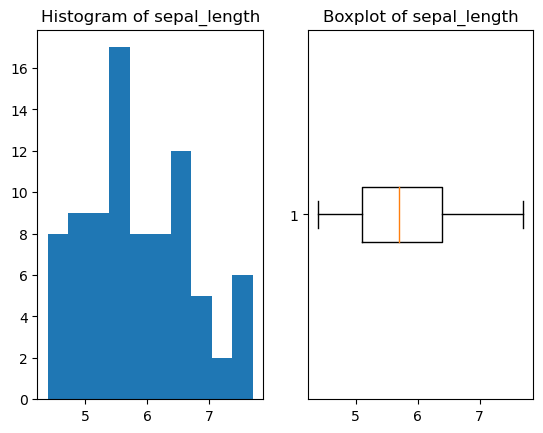

Summary statistics of sepal_length:

count    84.000000
mean      5.853571
std       0.855379
min       4.400000
25%       5.100000
50%       5.700000
75%       6.400000
max       7.700000
Name: sepal_length, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




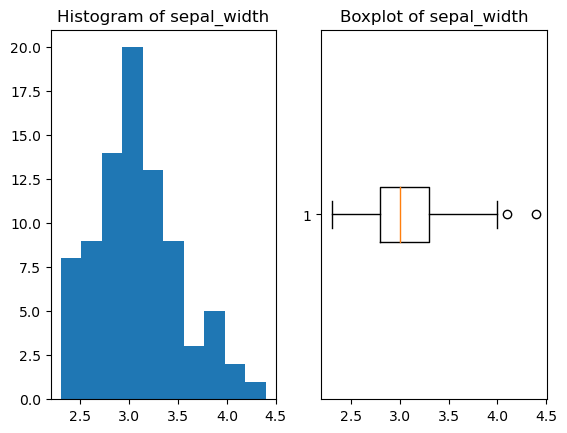

Summary statistics of sepal_width:

count    84.000000
mean      3.086905
std       0.428722
min       2.300000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




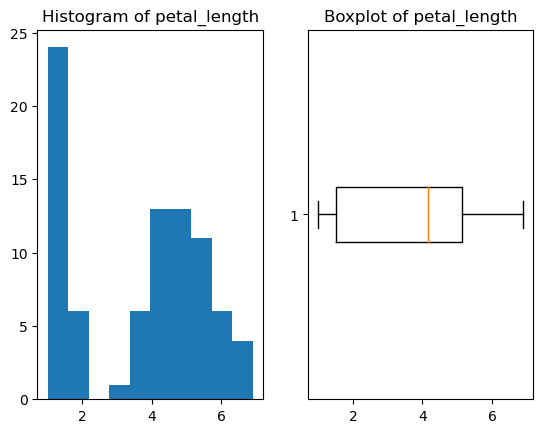

Summary statistics of petal_length:

count    84.000000
mean      3.697619
std       1.831648
min       1.000000
25%       1.500000
50%       4.150000
75%       5.125000
max       6.900000
Name: petal_length, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




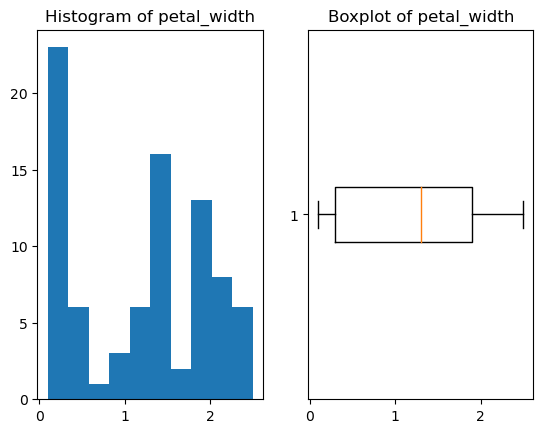

Summary statistics of petal_width:

count    84.000000
mean      1.180952
std       0.765440
min       0.100000
25%       0.300000
50%       1.300000
75%       1.900000
max       2.500000
Name: petal_width, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




In [88]:
# expand the check to create different visuals for the appropriate type
for col in train:
    if train[col].value_counts().count() > 5:
        plt.subplot(121)
        plt.hist(train[col])
        plt.title(f'Histogram of {col}')
        plt.subplot(122)
        plt.boxplot(train[col], vert=False)
        plt.title(f'Boxplot of {col}')
        plt.show()
        print(f'Summary statistics of {col}:\n')
        print(train[col].describe())
        print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')

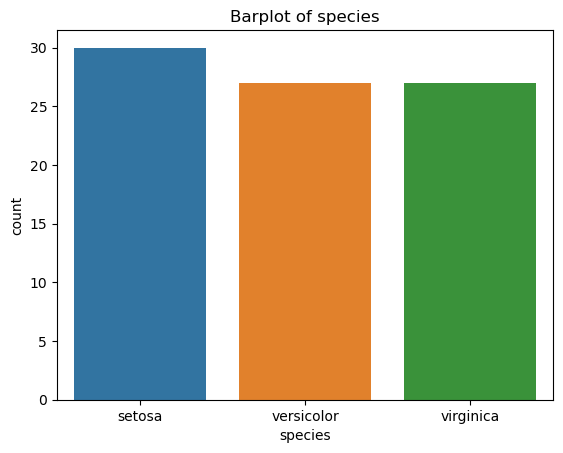

setosa        30
versicolor    27
virginica     27
Name: species, dtype: int64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




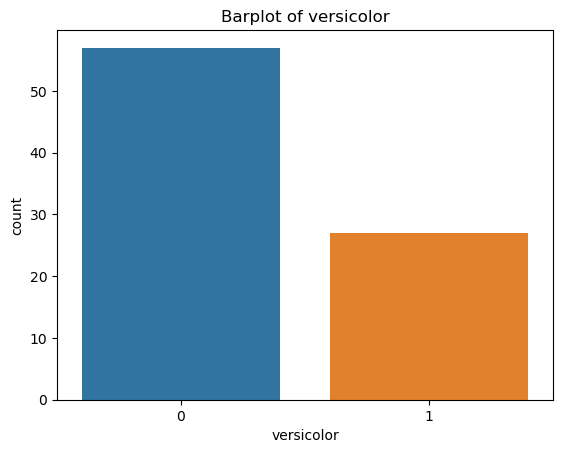

0    57
1    27
Name: versicolor, dtype: int64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




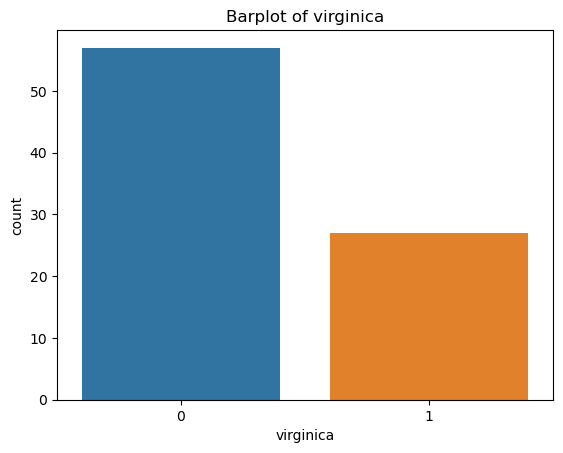

0    57
1    27
Name: virginica, dtype: int64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




In [96]:
# creating univariate graphs for the categorical variables
for col in train:
    if train[col].value_counts().count() <= 5:
        sns.countplot(data=train, x=col,)
        plt.title(f'Barplot of {col}')
        plt.show()
        print(train[col].value_counts())
        print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')

In [182]:
def univariate_stats(train):
    '''
    Parameters: *only* a train dataset as an argument
    Actions:
        1. Creates univariate datavisuals for all variables in the dataset
        2. Displays summary statistics for variables with more than 5 unique values
    Returns:
        1. If 
    '''
    explore_col, cat_col, num_col = determine_variable_type(train)
    
    for col in explore_col:
        if col in cat_col:
            sns.countplot(data=train, x=col,)
            plt.title(f'Barplot of {col.capitalize()}')
            plt.show()
            print(f'Value Frequency of {col.capitalize()}')
            print(pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
        elif col in num_col:
            plt.subplot(121)
            plt.hist(train[col])
            plt.title(f'Histogram of {col.capitalize()}')
            
            plt.subplot(122)
            sns.boxplot(data=train, x=col)
            plt.title(f'Boxplot of {col.capitalize()}')
            plt.show()
            
            print(f'Summary statistics of {col.capitalize()}:\n')
            print(train[col].describe())
            print('\n\n------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------\n\n')
    return

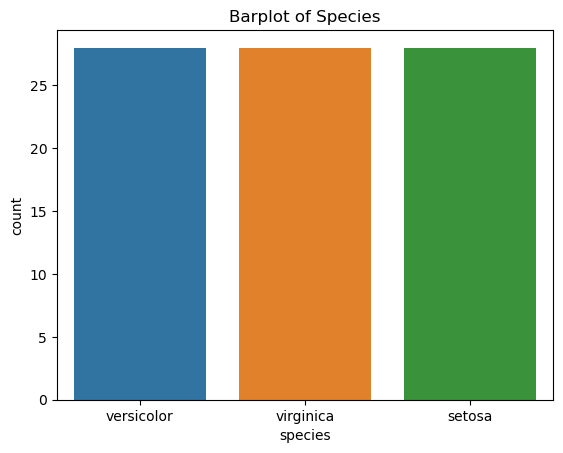

Value Frequency of Species
            species   species
versicolor       28  0.333333
virginica        28  0.333333
setosa           28  0.333333


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




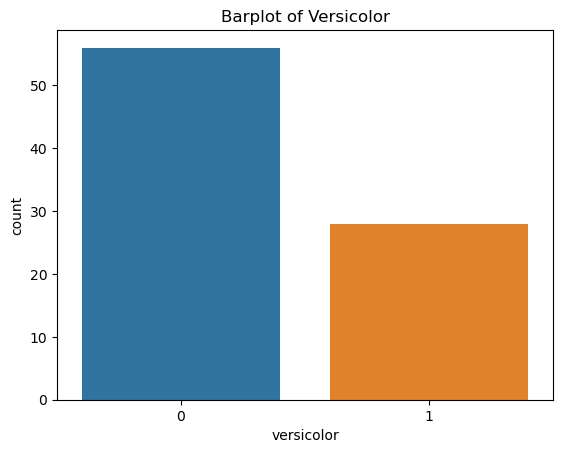

Value Frequency of Versicolor
   versicolor  versicolor
0          56    0.666667
1          28    0.333333


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




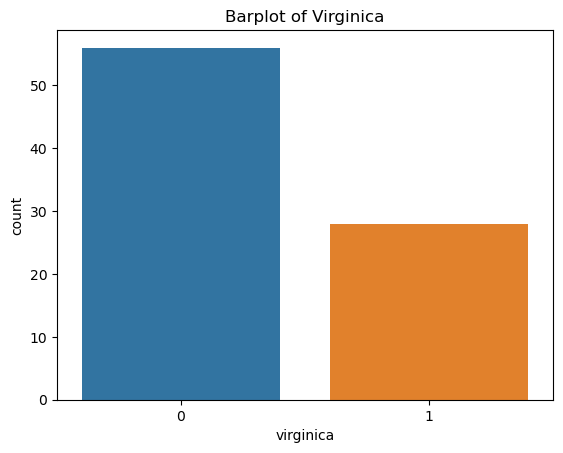

Value Frequency of Virginica
   virginica  virginica
0         56   0.666667
1         28   0.333333


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




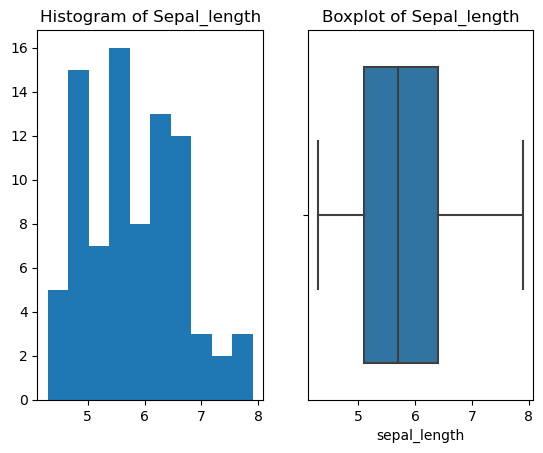

Summary statistics of Sepal_length:

count    84.000000
mean      5.802381
std       0.823155
min       4.300000
25%       5.100000
50%       5.700000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




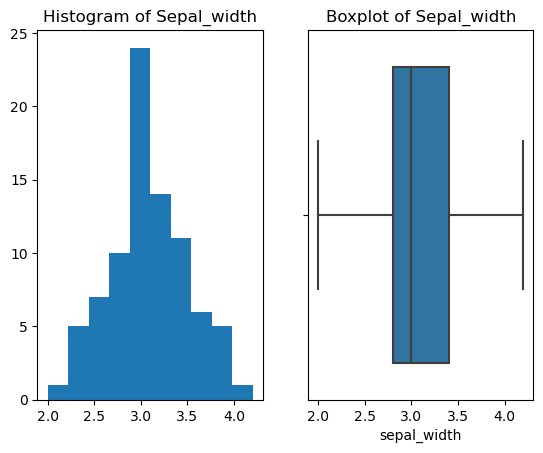

Summary statistics of Sepal_width:

count    84.000000
mean      3.071429
std       0.423574
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.200000
Name: sepal_width, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




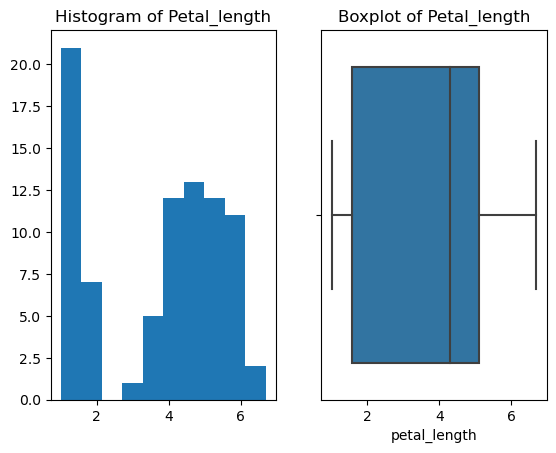

Summary statistics of Petal_length:

count    84.00000
mean      3.70000
std       1.74107
min       1.00000
25%       1.57500
50%       4.30000
75%       5.10000
max       6.70000
Name: petal_length, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




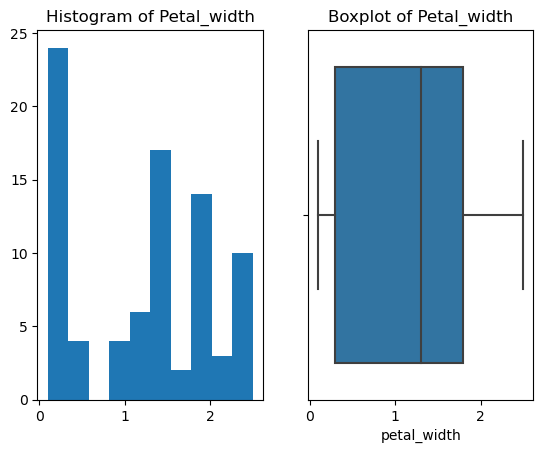

Summary statistics of Petal_width:

count    84.000000
mean      1.205952
std       0.783620
min       0.100000
25%       0.300000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------




In [183]:
univariate_stats(train)

>> ### Takeaways:
>>- Species: equal parts
>>- Sepal_length: range(4.5-7.5), looks mostly normally distributed
>>- Sepal_width : normal distribution in the histogram
>>- Petal_length: sample is not normally distributed, a break in the histogram, 2 peaks
>>- Petal_width: multiple peaks in the histogram, not normally distributed at all, likely corresponds with the 3 separate species
>>- Versicolor: Nothing to note
>>- virginica: Nothing to note

>> ### Actions:
>>- Only focus on the numerical variables, the catgorical variables are more of targets in this case

> ## Bivariate Stats:
>- Questions:


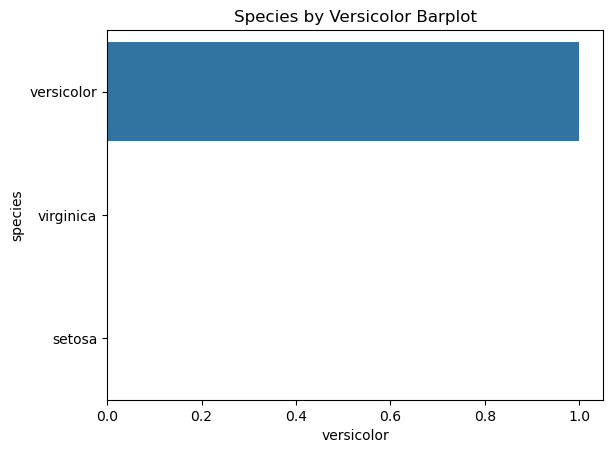

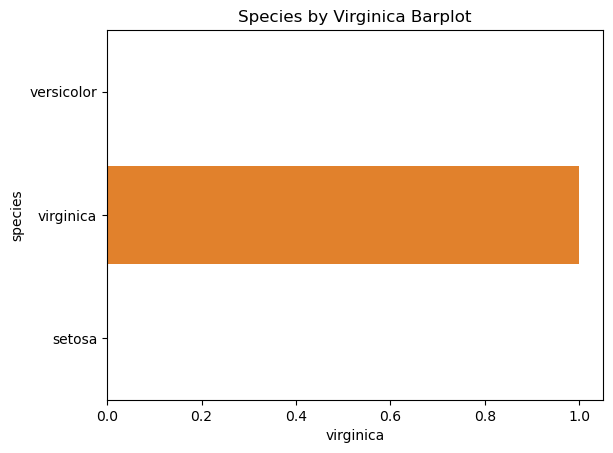

In [193]:
target = 'species'
for col in cat_col:
    if col != target:
        sns.barplot(data=train,
                    x=col, 
                    y=target,
                   ci=False)
        plt.axvline(train[col].mean(), c='r')
        plt.title(f'{target.capitalize()} by {col.capitalize()} Barplot')
        plt.show()

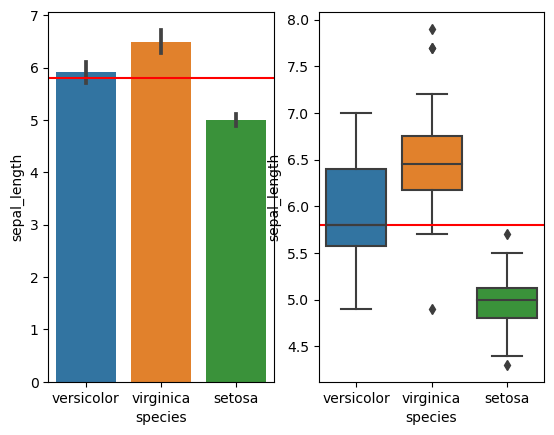

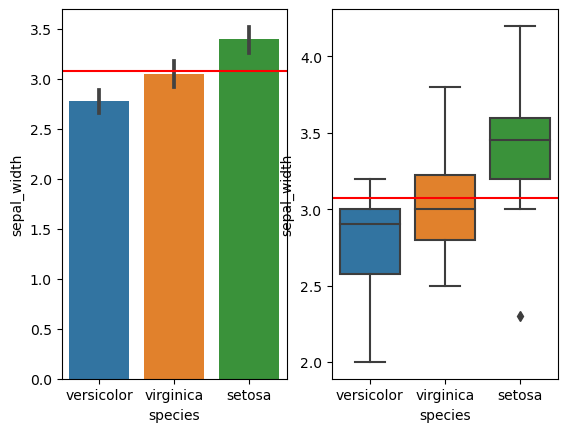

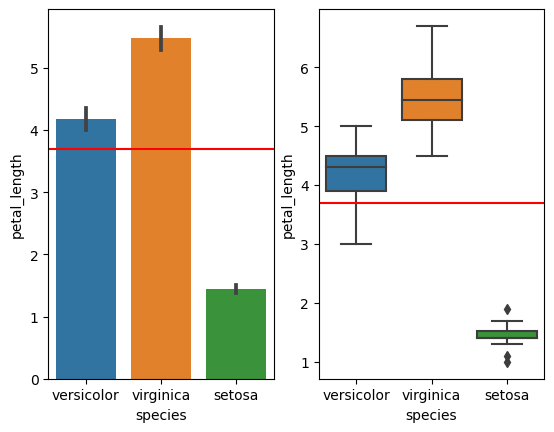

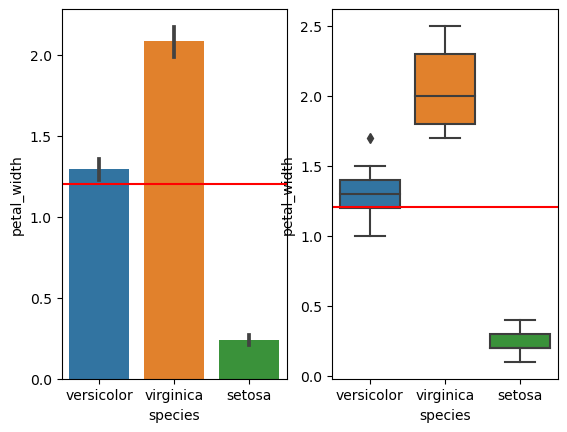

In [199]:
for col in num_col:
    if col != target:
        plt.subplot(121)
        sns.barplot(data=train,
                   x=target,
                   y=col)
        plt.axhline(train[col].mean(), c='r')
        
        plt.subplot(122)
        sns.boxplot(data=train,
                   x=target,
                   y=col)
        plt.axhline(train[col].mean(), c='r')
        plt.show()
        

In [237]:
### Descriptive statistics for each value within the numeric columns

target_values = list(train[target].unique())

for val in target_values:
    
    # creating a mask for each value to in the target values
    mask = (train[target] == val)
    
    # creating temporary ds with the boolean masked values
    masked_df = train[mask]
    print(f'''
      
      
      {val.upper()} 
    ''')
    for col in num_col:
        print(f'\nDescriptive statistics for {val} :{col}\n{masked_df[col].describe()}')


      
      
      VERSICOLOR 
    

Descriptive statistics for versicolor :sepal_length
count    28.000000
mean      5.917857
std       0.591954
min       4.900000
25%       5.575000
50%       5.800000
75%       6.400000
max       7.000000
Name: sepal_length, dtype: float64

Descriptive statistics for versicolor :sepal_width
count    28.000000
mean      2.775000
std       0.302612
min       2.000000
25%       2.575000
50%       2.900000
75%       3.000000
max       3.200000
Name: sepal_width, dtype: float64

Descriptive statistics for versicolor :petal_length
count    28.000000
mean      4.182143
std       0.501888
min       3.000000
25%       3.900000
50%       4.300000
75%       4.500000
max       5.000000
Name: petal_length, dtype: float64

Descriptive statistics for versicolor :petal_width
count    28.000000
mean      1.292857
std       0.180388
min       1.000000
25%       1.200000
50%       1.300000
75%       1.400000
max       1.700000
Name: petal_width, dtype: float64

     

In [240]:
cat_col[-2:]

['versicolor', 'virginica']